In [59]:
import numpy as np

def create_hamiltonian(N, J, U, epsilon):
    # Number of basis states
    dim = N + 1
    
    # Initialize Hamiltonian matrix
    H = np.zeros((dim, dim))
    
    # Construct basis states
    for n in range(-N, N+1, 2):
        i = (N + n) // 2
        j = (N - n) // 2
        
        # Diagonal terms
        H[i, i] = U * (i*(i-1) + j*(j-1)) / (N) + epsilon * (i - j)        
        # Off-diagonal hopping terms
        if i < N:
            H[i, i+1] = -J * np.sqrt((N-i)*(i+1))
            H[i+1, i] = -J * np.sqrt((N-i)*(i+1))
        if j < N:
            H[j, j+1] = -J * np.sqrt((N-j)*(j+1))
            H[j+1, j] = -J * np.sqrt((N-j)*(j+1))
    
    return H

print(create_hamiltonian(5,1,2,0.5))

[[ 5.5        -2.23606798  0.          0.          0.          0.        ]
 [-2.23606798  3.3        -2.82842712  0.          0.          0.        ]
 [ 0.         -2.82842712  2.7        -3.          0.          0.        ]
 [ 0.          0.         -3.          3.7        -2.82842712  0.        ]
 [ 0.          0.          0.         -2.82842712  6.3        -2.23606798]
 [ 0.          0.          0.          0.         -2.23606798 10.5       ]]


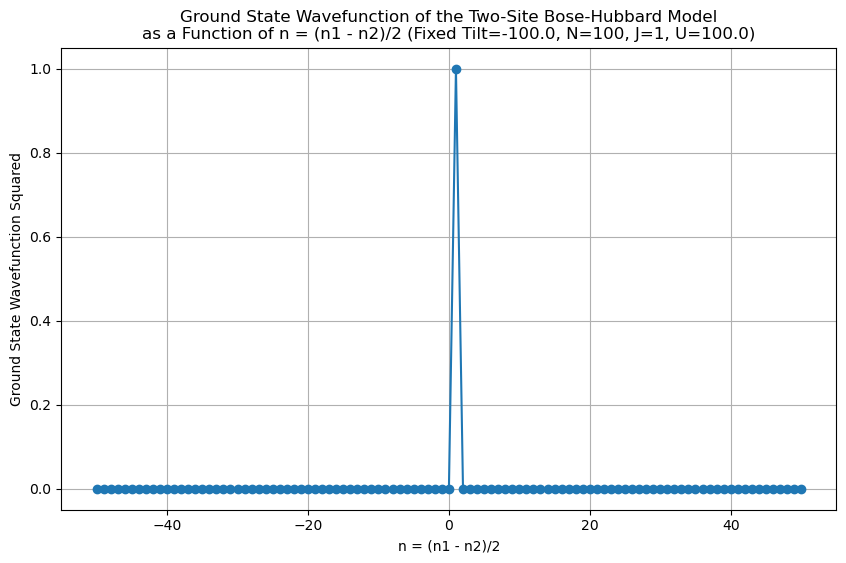

In [5]:
import matplotlib.pyplot as plt
from scipy.linalg import eigvalsh_tridiagonal


N = 100  # Total number of particles
J = 1  # Hopping parameter
U = 1e2  # On-site interaction energy
epsilon = 0.5  # Tilt strength

# Choose a fixed tilt value for analysis
fixed_tilt = -U  # Use the same tilt value as U for demonstration

# Calculate the difference (n1 - n2)/2
n_diff = np.arange(-N, N + 1, 2) / 2

# Initialize arrays to store the wavefunctions
wavefunctions_fixed_tilt = np.zeros((len(n_diff), N + 1))

# Construct the Hamiltonian matrix for the fixed tilt
H_fixed_tilt = create_hamiltonian( N, J, U, fixed_tilt)

# Calculate the eigenstates for the fixed tilt
eigenvals_fixed_tilt, eigenvecs_fixed_tilt = np.linalg.eigh(H_fixed_tilt)

# Select the ground state (lowest energy eigenstate)
ground_state_index = np.argmin(eigenvals_fixed_tilt)
ground_state_wavefunction_fixed_tilt = np.abs(eigenvecs_fixed_tilt[:, ground_state_index]) ** 2

# Plot the ground state wavefunction as a function of (n1 - n2)/2 for the fixed tilt
plt.figure(figsize=(10, 6))
plt.plot(n_diff, ground_state_wavefunction_fixed_tilt, marker='o')
plt.xlabel('n = (n1 - n2)/2')
plt.ylabel('Ground State Wavefunction Squared')
plt.title(f'Ground State Wavefunction of the Two-Site Bose-Hubbard Model\nas a Function of n = (n1 - n2)/2 (Fixed Tilt={fixed_tilt}, N={N}, J={J}, U={U})')
plt.grid()
plt.show()

In [60]:
from scipy.linalg import eigh_tridiagonal

def ground_state(N, J, U, epsilon):
    H = create_hamiltonian(N, J, U, epsilon)
    eigenvals, eigenvecs = eigh_tridiagonal(H.diagonal(), np.diag(H, -1))
    idx = np.argsort(eigenvals)
    ground_state_index = idx[0]
    ground_state_energy = eigenvals[ground_state_index]
    ground_state_wavefunction = eigenvecs[:, ground_state_index]
    return ground_state_energy, ground_state_wavefunction

def fidelity(state1, state2):
    return np.abs(np.dot(np.conj(state1), state2)) ** 2

def fidelity_susceptibility(N, J, U, epsilon, delta_epsilon):
    state1_energy, state1_wavefunction = ground_state(N, J, U, epsilon)
    state2_energy, state2_wavefunction = ground_state(N, J, U, epsilon + delta_epsilon)
    f1 = fidelity(state1_wavefunction, state2_wavefunction)
    f2 = fidelity(state1_wavefunction, state1_wavefunction)
    f3 = fidelity(state2_wavefunction, state2_wavefunction)
    return (-2 * np.log(f1)) / (delta_epsilon ** 2)

N = 100  # Total number of particles
J = 1  # Hopping parameter
epsilon = 100  # Tilt strength
delta_epsilon = 0.0001  # Small change in tilt for fidelity susceptibility

# Range of U/J values to explore
U_over_J_values = np.linspace(0, 20, 1000)
epsilon_values = [1,3, 5, 10 ]
susceptibility_values = [[] for _ in range(len(epsilon_values))]  # Initialize as a list of lists


for i, U_over_J in enumerate(U_over_J_values):
    U = U_over_J * J
    for j, ep in enumerate(epsilon_values):
        susceptibility = fidelity_susceptibility(N, J, U, ep, delta_epsilon)
        susceptibility_values[j].append(susceptibility)


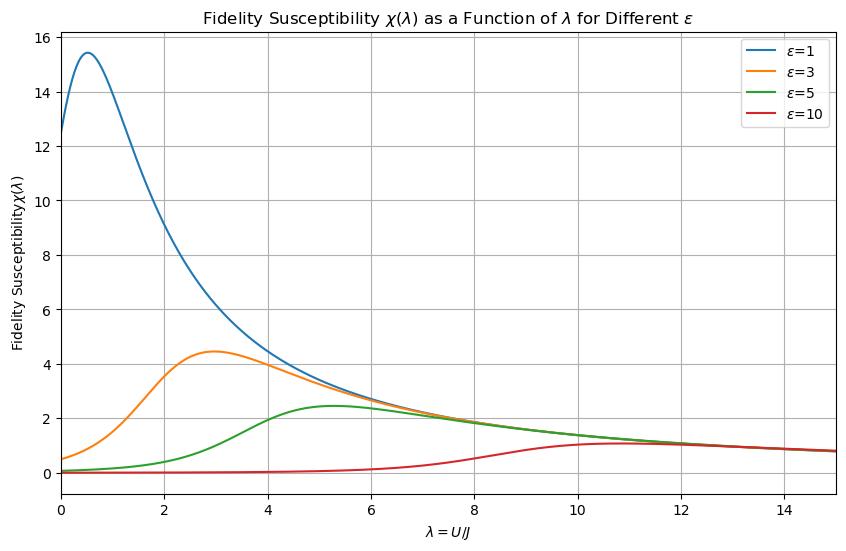

In [67]:
# Plotting the fidelity susceptibility as a function of U/J
plt.figure(figsize=(10, 6))
for idx, ep in enumerate(epsilon_values):
    plt.plot(U_over_J_values, susceptibility_values[idx], label=f'$\epsilon$={ep}')
plt.xlabel('$\lambda = U/J$')
plt.ylabel('Fidelity Susceptibility$\chi(\lambda)$')
plt.title('Fidelity Susceptibility $\chi(\lambda)$ as a Function of $\lambda$ for Different $\epsilon$')
plt.legend()
plt.xlim(0,15)
plt.grid()
plt.show()

In [76]:
from scipy.linalg import eigh_tridiagonal

def ground_state(N, J, U, epsilon):
    H = create_hamiltonian(N, J, U, epsilon)
    eigenvals, eigenvecs = eigh_tridiagonal(H.diagonal(), np.diag(H, -1))
    idx = np.argsort(eigenvals)
    ground_state_index = idx[0]
    ground_state_energy = eigenvals[ground_state_index]
    ground_state_wavefunction = eigenvecs[:, ground_state_index]
    return ground_state_energy, ground_state_wavefunction

def fidelity(state1, state2):
    return np.abs(np.dot(np.conj(state1), state2)) ** 2

def fidelity_susceptibility(N, J, U, epsilon, delta_epsilon):
    state1_energy, state1_wavefunction = ground_state(N, J, U, epsilon)
    state2_energy, state2_wavefunction = ground_state(N, J, U, epsilon + delta_epsilon)
    f1 = fidelity(state1_wavefunction, state2_wavefunction)
    f2 = fidelity(state1_wavefunction, state1_wavefunction)
    f3 = fidelity(state2_wavefunction, state2_wavefunction)
    return (-2 * np.log(f1)) / (delta_epsilon ** 2)

N = 100  # Total number of particles
J = 1  # Hopping parameter
epsilon = 5  # Tilt strength
delta_epsilon = 0.0001  # Small change in tilt for fidelity susceptibility

# Range of U/J values to explore
U_over_J_values = np.linspace(0, 20, 100)
N_values = [800, 1000, 500]
susceptibility_values = [[] for _ in range(len(N_values))]  # Initialize as a list of lists


for i, U_over_J in enumerate(U_over_J_values):
    U = U_over_J * J
    for j, ep in enumerate(N_values):
        susceptibility = fidelity_susceptibility(ep, J, U, epsilon, delta_epsilon)
        susceptibility_values[j].append(susceptibility)



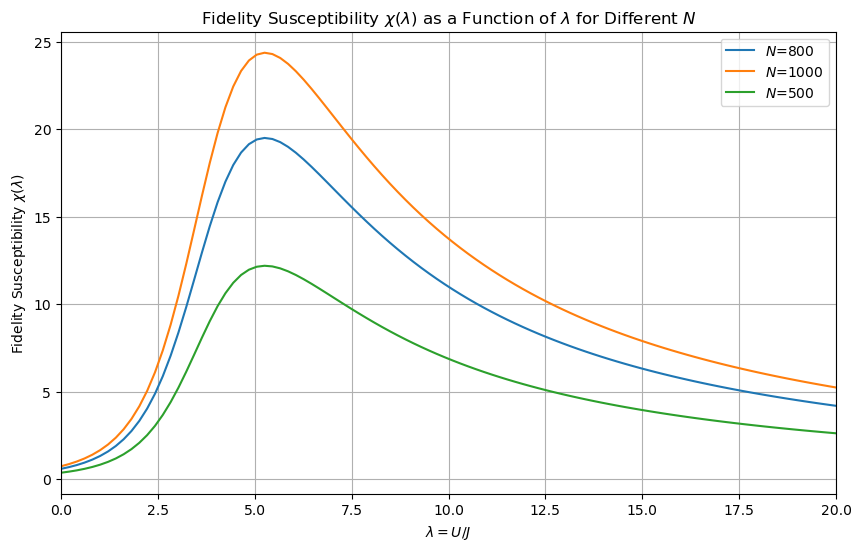

In [85]:
# Plotting the fidelity susceptibility as a function of U/J
plt.figure(figsize=(10, 6))
for idx, ep in enumerate(N_values):
    plt.plot(U_over_J_values, susceptibility_values[idx], label=f'$N$={ep}')
plt.xlabel('$\lambda = U/J$')
plt.ylabel('Fidelity Susceptibility $\chi(\lambda)$')
plt.title('Fidelity Susceptibility $\chi(\lambda)$ as a Function of $\lambda$ for Different $N$')
plt.legend()
plt.xlim(0, 20)

plt.grid()
plt.show()


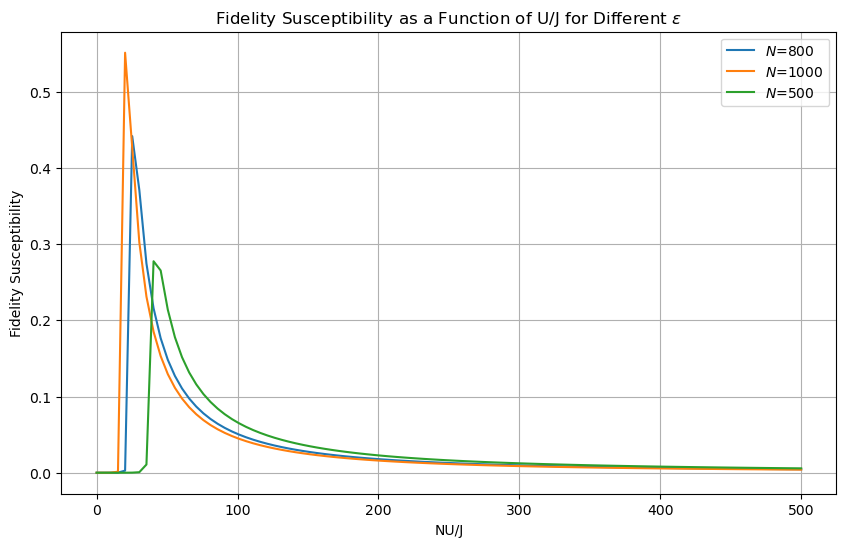

In [38]:
from scipy.linalg import eigh_tridiagonal

def ground_state(N, J, U, epsilon):
    H = create_hamiltonian(N, J, U, epsilon)
    eigenvals, eigenvecs = eigh_tridiagonal(H.diagonal(), np.diag(H, -1))
    idx = np.argsort(eigenvals)
    ground_state_index = idx[0]
    ground_state_energy = eigenvals[ground_state_index]
    ground_state_wavefunction = eigenvecs[:, ground_state_index]
    return ground_state_energy, ground_state_wavefunction

def fidelity(state1, state2):
    return np.abs(np.dot(np.conj(state1), state2)) ** 2

def fidelity_susceptibility(N, J, U, epsilon, delta_epsilon):
    state1_energy, state1_wavefunction = ground_state(N, J, U, epsilon)
    state2_energy, state2_wavefunction = ground_state(N, J, U, epsilon + delta_epsilon)
    f1 = fidelity(state1_wavefunction, state2_wavefunction)
    f2 = fidelity(state1_wavefunction, state1_wavefunction)
    f3 = fidelity(state2_wavefunction, state2_wavefunction)
    return (-2 * np.log(f1)) / (delta_epsilon ** 2)

N = 100  # Total number of particles
J = 1  # Hopping parameter
epsilon = 100  # Tilt strength
delta_epsilon = 0.0001  # Small change in tilt for fidelity susceptibility

# Range of U/J values to explore
U_over_J_values = np.linspace(0, 5, 100)
N_values = [800, 1000, 500]
susceptibility_values = [[] for _ in range(len(N_values))]  # Initialize as a list of lists


for i, U_over_J in enumerate(U_over_J_values):
    U = U_over_J * J
    for j, ep in enumerate(N_values):
        susceptibility = fidelity_susceptibility(ep, J, U, epsilon, delta_epsilon)
        susceptibility_values[j].append(susceptibility)



In [ ]:
from scipy.linalg import eigh_tridiagonal


def ground_state(N, J, U, epsilon):
    H = create_hamiltonian(N, J, U, epsilon)
    eigenvals, eigenvecs = eigh_tridiagonal(H.diagonal(), np.diag(H, -1))
    idx = np.argsort(eigenvals)
    ground_state_index = idx[0]
    ground_state_energy = eigenvals[ground_state_index]
    ground_state_wavefunction = eigenvecs[:, ground_state_index]
    return ground_state_energy, ground_state_wavefunction


def fidelity(state1, state2):
    return np.abs(np.dot(np.conj(state1), state2)) ** 2

def fidelity_susceptibility(N, J, U, epsilon, delta_epsilon):
    state1_energy, state1_wavefunction = ground_state(N, J, U, epsilon)
    state2_energy, state2_wavefunction = ground_state(N, J, U, epsilon + delta_epsilon)
    f1 = fidelity(state1_wavefunction, state2_wavefunction)
    f2 = fidelity(state1_wavefunction, state1_wavefunction)
    f3 = fidelity(state2_wavefunction, state2_wavefunction)
    return (-2 * np.log(f1)) / (delta_epsilon ** 2)


N = 100  # Total number of particles
J = 1  # Hopping parameter
U = 100  # On-site interaction energy
delta_epsilon = 0.0001  # Small change in tilt for fidelity susceptibility

# Range of tilt values to explore
epsilon_values = np.linspace(0, 100, 100)
susceptibility_values = []
susceptibility_values2= []
susceptibility_values3= []

for epsilon in epsilon_values:
    susceptibility = fidelity_susceptibility(N, J, 50, epsilon, delta_epsilon)
    susceptibility_values.append(susceptibility)
    susceptibility2 = fidelity_susceptibility(N, J, 75, epsilon, delta_epsilon)
    susceptibility_values2.append(susceptibility2)
    susceptibility3 = fidelity_susceptibility(N, J, 100, epsilon, delta_epsilon)
    susceptibility_values3.append(susceptibility3)

In [21]:
H1 = create_hamiltonian(N, J, U, 1)
H2 = create_hamiltonian(N, J, U, 1 + 0.5)

eigenvals1, eigenvecs1 = eigh_tridiagonal(H1.diagonal(), np.diag(H1, -1))
eigenvals2, eigenvecs2 = eigh_tridiagonal(H2.diagonal(), np.diag(H2, -1))

idx = np.argsort(eigenvals1)
ground_state_index = idx[0]
ground_state_energy1 = eigenvals1[ground_state_index]
ground_state_wavefunction1 = eigenvecs1[ground_state_index]

idx2 = np.argsort(eigenvals2)
ground_state_index = idx2[0]
ground_state_energy2 = eigenvals2[ground_state_index]


print(ground_state_energy1, ground_state_energy2, ground_state_wavefunction1)

244961.53437917554 244961.52532407668 [6.01108661e-151 0.00000000e+000 0.00000000e+000 0.00000000e+000
 0.00000000e+000 0.00000000e+000 0.00000000e+000 0.00000000e+000
 0.00000000e+000 0.00000000e+000 0.00000000e+000 0.00000000e+000
 0.00000000e+000 0.00000000e+000 0.00000000e+000 0.00000000e+000
 0.00000000e+000 0.00000000e+000 0.00000000e+000 0.00000000e+000
 0.00000000e+000 0.00000000e+000 0.00000000e+000 0.00000000e+000
 0.00000000e+000 0.00000000e+000 0.00000000e+000 0.00000000e+000
 0.00000000e+000 0.00000000e+000 0.00000000e+000 0.00000000e+000
 0.00000000e+000 0.00000000e+000 0.00000000e+000 0.00000000e+000
 0.00000000e+000 0.00000000e+000 0.00000000e+000 0.00000000e+000
 0.00000000e+000 0.00000000e+000 0.00000000e+000 0.00000000e+000
 0.00000000e+000 0.00000000e+000 0.00000000e+000 0.00000000e+000
 0.00000000e+000 0.00000000e+000 0.00000000e+000 0.00000000e+000
 0.00000000e+000 0.00000000e+000 0.00000000e+000 0.00000000e+000
 0.00000000e+000 0.00000000e+000 0.00000000e+000 0.0

In [42]:
psig1 =  eigenvecs1[idx[0]]
psig2 = eigenvecs2[idx2[0]]
#np.sum(np.abs(psig1)**2)
#np.sum(np.abs(psig2)**2)
np.abs(np.sum(np.conj(psig1)*psig2))**2

0.9999999999999896

In [43]:

np.abs(np.dot(np.conj(psig1), psig2)) ** 2

0.9999999999999896

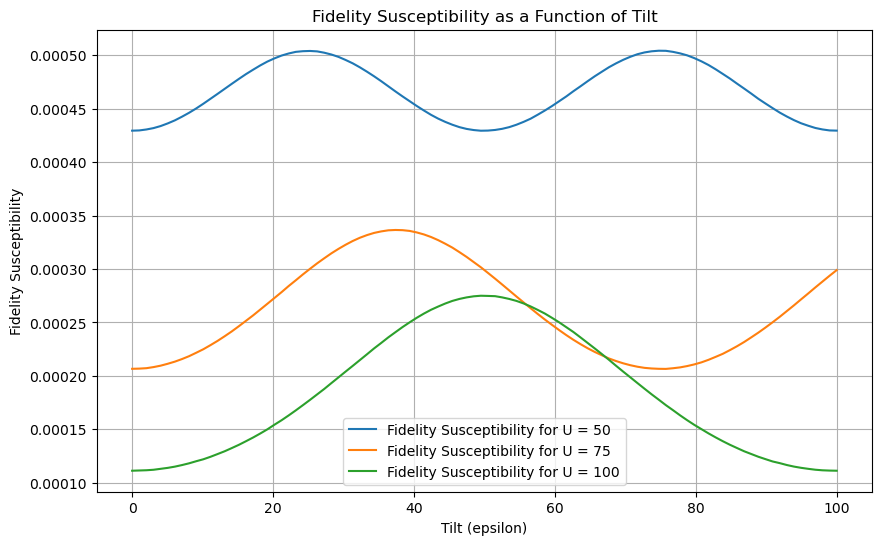

In [20]:
# Plotting the fidelity susceptibility as a function of tilt (epsilon)
plt.figure(figsize=(10, 6))
plt.plot(epsilon_values, susceptibility_values, label='Fidelity Susceptibility for U = 50')
plt.plot(epsilon_values, susceptibility_values2, label='Fidelity Susceptibility for U = 75')
plt.plot(epsilon_values, susceptibility_values3, label='Fidelity Susceptibility for U = 100')
plt.xlabel('Tilt (epsilon)')
plt.ylabel('Fidelity Susceptibility')
plt.title('Fidelity Susceptibility as a Function of Tilt')
plt.legend()
plt.grid()
plt.show()
